<a href="https://colab.research.google.com/github/Harshyadv/Worked-up/blob/main/PureCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from medmnist import INFO, Evaluator
import medmnist
from torchvision import transforms
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, precision_score, recall_score

In [14]:
# Load MedMNIST dataset
data_flag = 'pathmnist'  # You can choose different datasets from MedMNIST
download = True

# Data Preparation
data_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[.5], std=[.5])
])

In [20]:
# Load the train and test datasets
train_dataset = getattr(medmnist, INFO[data_flag]['python_class'])(
    split='train', transform=data_transform, download=download)
test_dataset = getattr(medmnist, INFO[data_flag]['python_class'])(
    split='test', transform=data_transform, download=download)

x_train, y_train = np.array(train_dataset.imgs), np.array(train_dataset.labels)
x_test, y_test = np.array(test_dataset.imgs), np.array(test_dataset.labels)

# Convert RGB images to grayscale if necessary
if x_train.shape[-1] == 3:  # Check if images are RGB
    x_train = tf.image.rgb_to_grayscale(x_train).numpy()
    x_test = tf.image.rgb_to_grayscale(x_test).numpy()

x_train = x_train / 255.0  # Normalize
x_test = x_test / 255.0

# Ensure the shape is as expected by the model
print("Shape of x_train:", x_train.shape)  # Verify the shape

Using downloaded and verified file: /root/.medmnist/pathmnist.npz
Using downloaded and verified file: /root/.medmnist/pathmnist.npz
Shape of x_train: (89996, 28, 28, 1)


In [21]:
# Create the classical CNN model
def create_classical_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    return model

In [22]:
# Create the model
classical_model = create_classical_model()

In [24]:
# Compile the model
classical_model.compile(optimizer='adam',
                        loss='sparse_categorical_crossentropy',
                        metrics=['accuracy'])

In [25]:
# Train the model
history = classical_model.fit(x_train, y_train,
                              epochs=5,
                              batch_size=32,
                              validation_split=0.1)

Epoch 1/5
2532/2532 [==============================] - 135s 53ms/step - loss: 1.3445 - accuracy: 0.4963 - val_loss: 1.0922 - val_accuracy: 0.5823
Epoch 2/5
2532/2532 [==============================] - 124s 49ms/step - loss: 0.9859 - accuracy: 0.6314 - val_loss: 0.9179 - val_accuracy: 0.6587
Epoch 3/5
2532/2532 [==============================] - 124s 49ms/step - loss: 0.8410 - accuracy: 0.6896 - val_loss: 0.8867 - val_accuracy: 0.6709
Epoch 4/5
2532/2532 [==============================] - 125s 50ms/step - loss: 0.7555 - accuracy: 0.7186 - val_loss: 0.7338 - val_accuracy: 0.7369
Epoch 5/5
2532/2532 [==============================] - 124s 49ms/step - loss: 0.6851 - accuracy: 0.7457 - val_loss: 0.7384 - val_accuracy: 0.7260


In [30]:
# Evaluate the model
test_loss, test_acc = classical_model.evaluate(x_test, y_test, verbose=2)
predictions = classical_model.predict(x_test)
f1_score = f1_score(y_test, predictions.argmax(axis=1), average='weighted')
precision = precision_score(y_test, predictions.argmax(axis=1), average='weighted')
recall = recall_score(y_test, predictions.argmax(axis=1), average='weighted')
print(f'Test Accuracy: {test_acc}')
print(f'Test Loss: {test_loss}')
print(f"F1 Score: {f1_score}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

225/225 - 2s - loss: 0.7767 - accuracy: 0.7415 - 2s/epoch - 9ms/step
225/225 [==============================] - 3s 14ms/step
Test Accuracy: 0.7415041923522949
Test Loss: 0.7766639590263367
F1 Score: 0.7395784107919081
Precision: 0.7600953707873999
Recall: 0.7415041782729805


In [31]:
# Visualize training and validation accuracy and loss
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

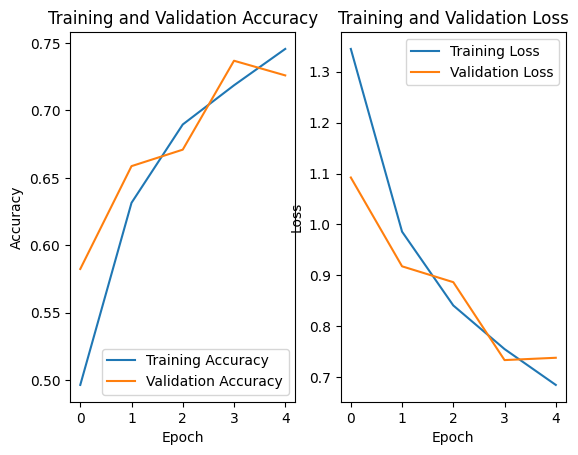

In [33]:
# Training accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Training loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()